In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Afgcc132/An-lisis-de-datos-con-Python/refs/heads/main/Notas%20y%20Horas%20de%20estudio.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### Analysis of the target variable

Promedio: 67.23565914938702
Moda: 0    68
Name: Exam_Score, dtype: int64
Mediana: 67.0


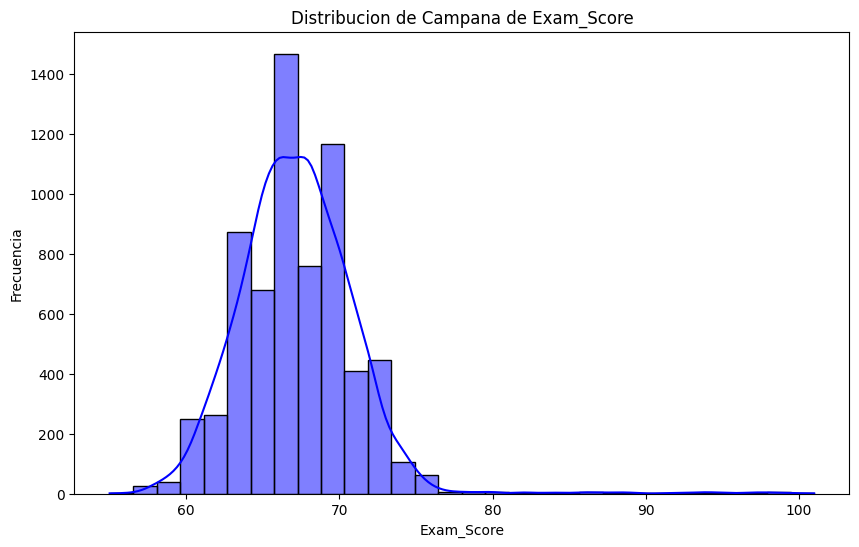

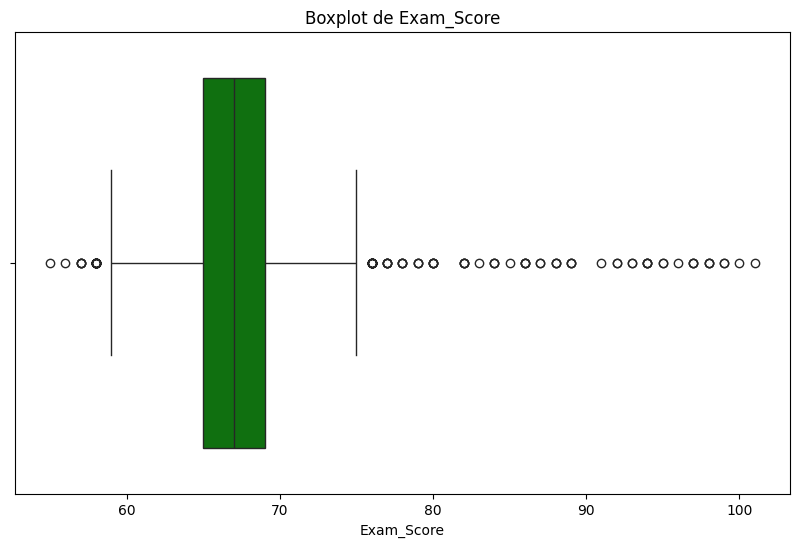

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt



# MMM
promedio = df['Exam_Score'].mean()
moda = df['Exam_Score'].mode()  
mediana = df['Exam_Score'].median()

print(f"Promedio: {promedio}")
print(f"Moda: {moda}")
print(f"Mediana: {mediana}")

# Grafico de distribucion 
plt.figure(figsize=(10, 6))
sns.histplot(df['Exam_Score'], kde=True, color='blue', bins=30)
plt.title('Distribucion de Campana de Exam_Score')
plt.xlabel('Exam_Score')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Exam_Score'], color='green')
plt.title('Boxplot de Exam_Score')
plt.xlabel('Exam_Score')
plt.show()

### For this context I'll leave the outlyers in.


Analysis for: Hours_Studied
Promedio: 19.975329196306948
Moda: 0    20
Name: Hours_Studied, dtype: int64
Mediana: 20.0


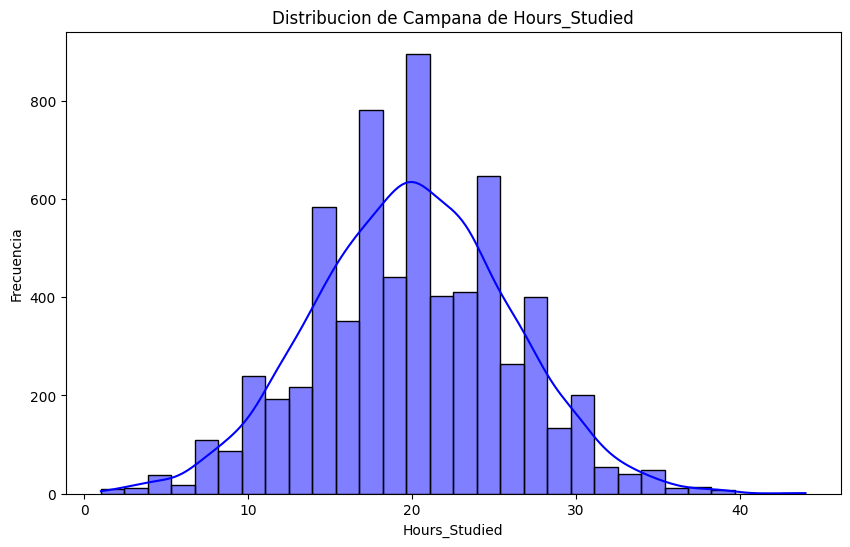

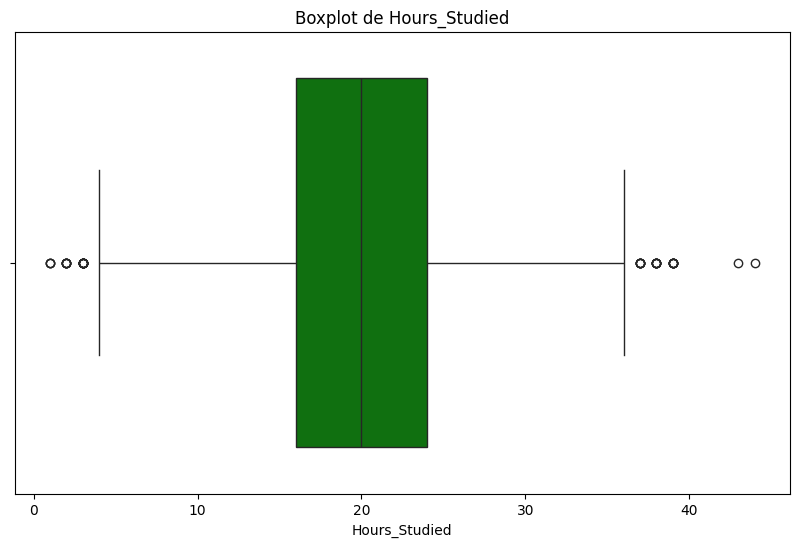


Analysis for: Attendance
Promedio: 79.97744816104132
Moda: 0    67
Name: Attendance, dtype: int64
Mediana: 80.0


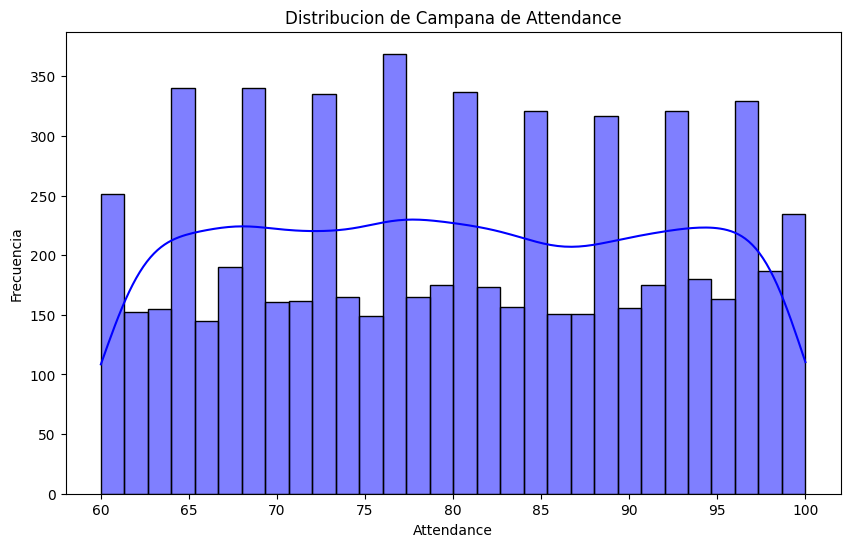

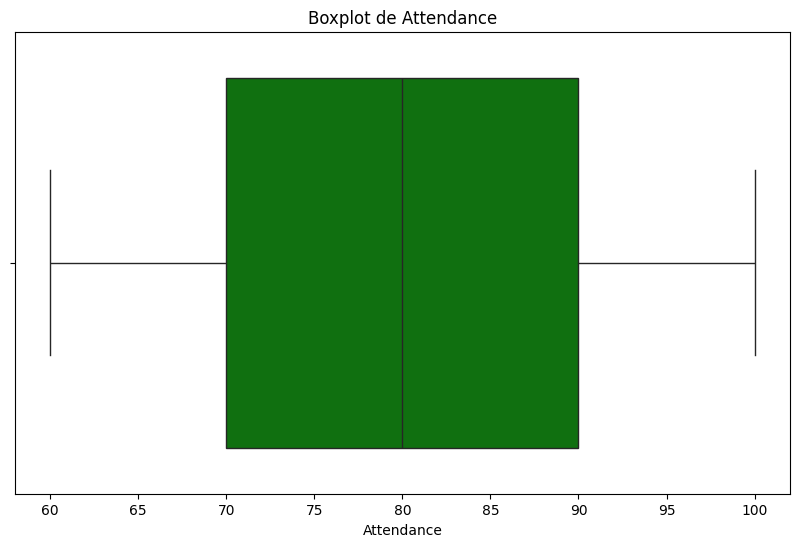


Analysis for: Sleep_Hours
Promedio: 7.029060087785682
Moda: 0    7
Name: Sleep_Hours, dtype: int64
Mediana: 7.0


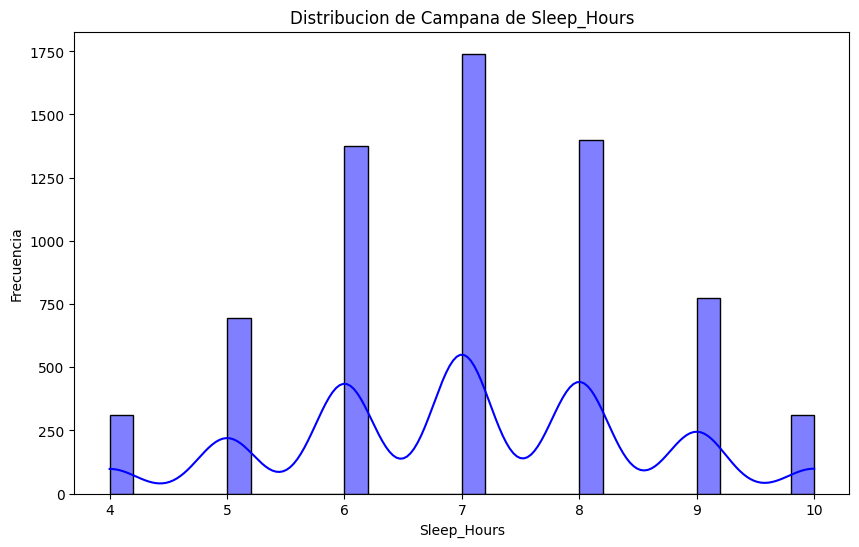

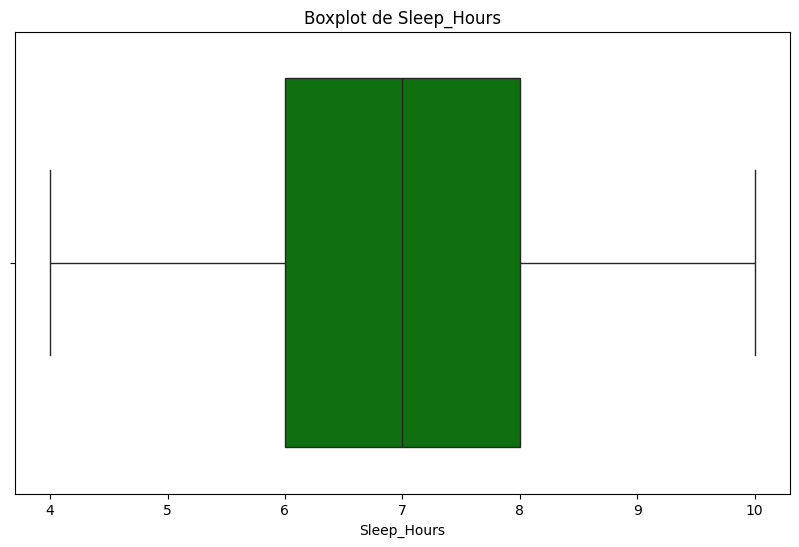


Analysis for: Previous_Scores
Promedio: 75.07053125472983
Moda: 0    66
Name: Previous_Scores, dtype: int64
Mediana: 75.0


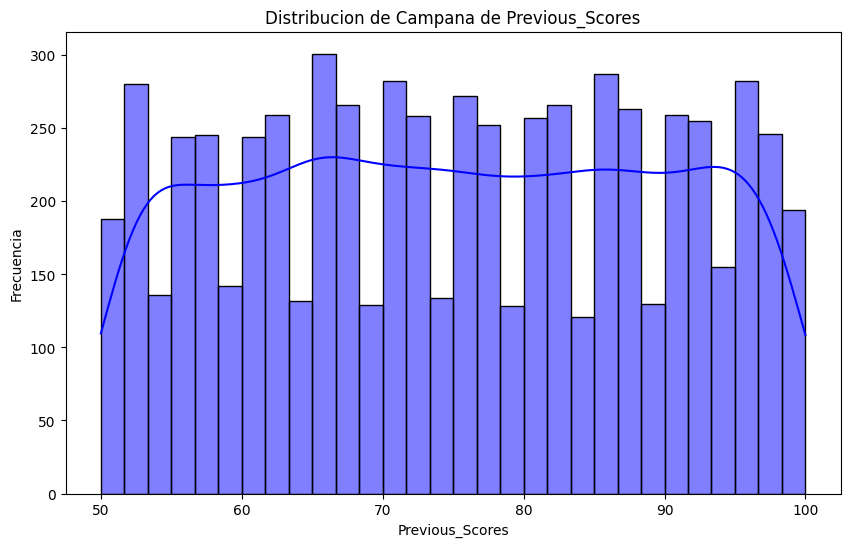

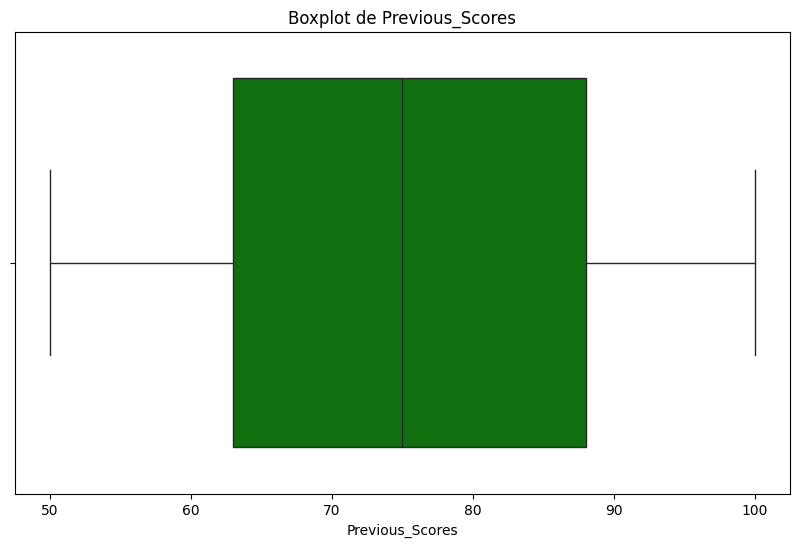


Analysis for: Tutoring_Sessions
Promedio: 1.4937187831088239
Moda: 0    1
Name: Tutoring_Sessions, dtype: int64
Mediana: 1.0


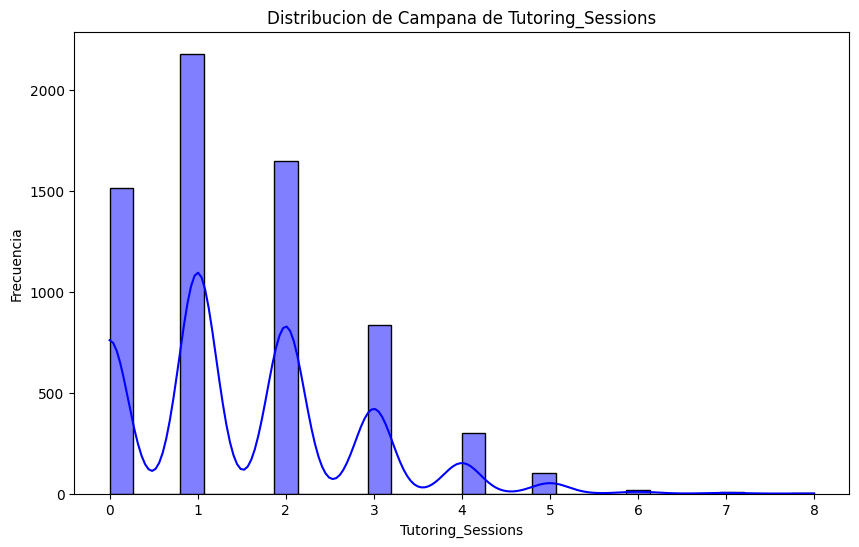

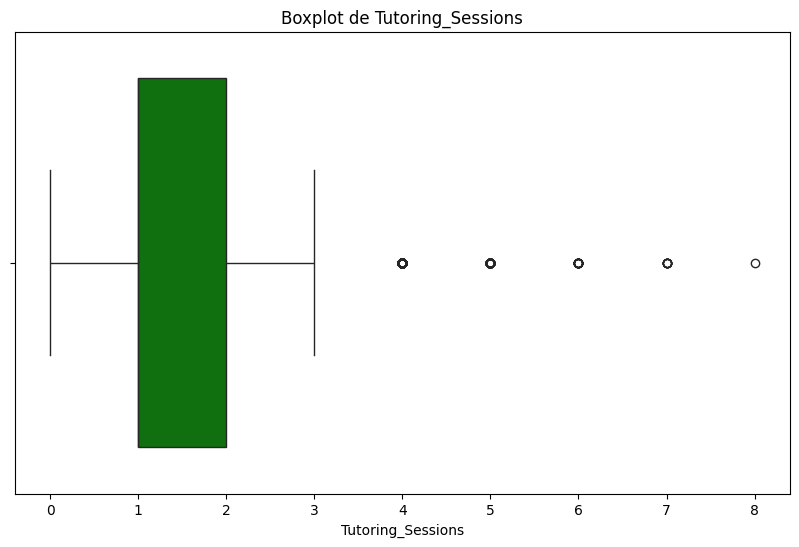


Analysis for: Physical_Activity
Promedio: 2.9676101104888755
Moda: 0    3
Name: Physical_Activity, dtype: int64
Mediana: 3.0


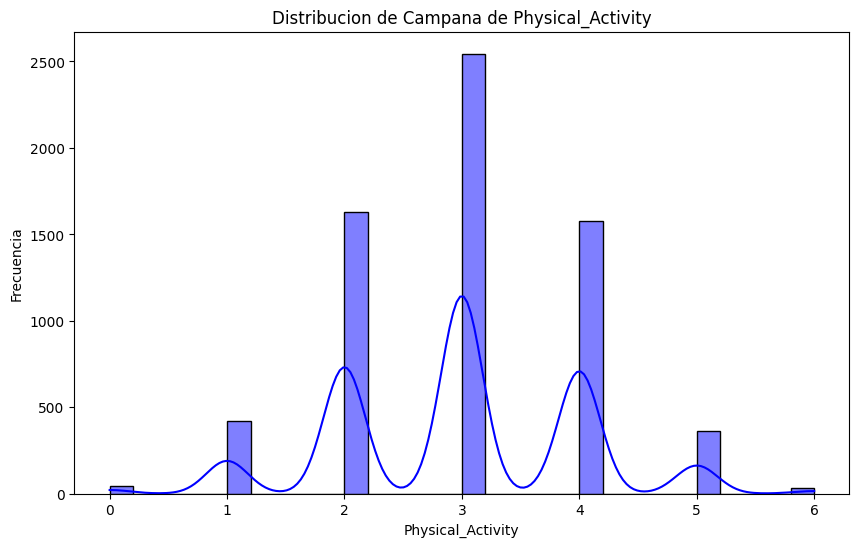

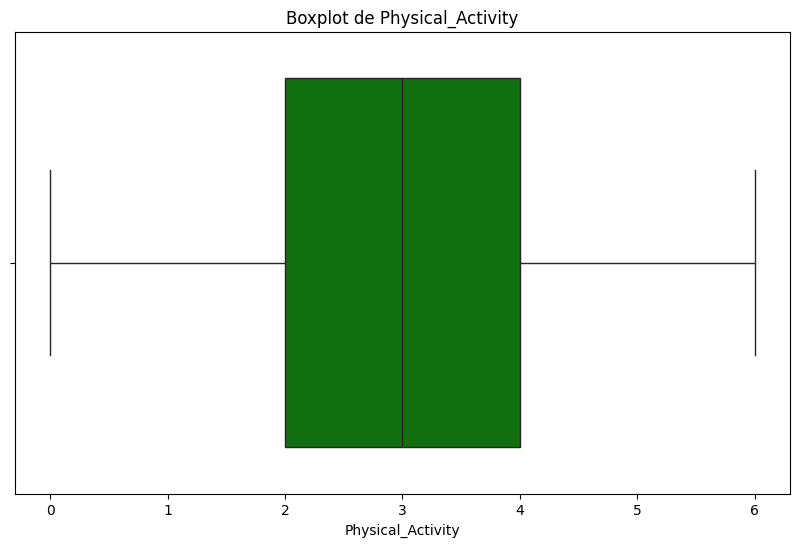

In [8]:
# Analysing all numerical data

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
response_variable = 'Exam_Score'
numeric_columns = numeric_columns.drop(response_variable)

for col in numeric_columns:
    print(f"\nAnalysis for: {col}")
    
    promedio = df[col].mean()
    moda = df[col].mode()  
    mediana = df[col].median()

    print(f"Promedio: {promedio}")
    print(f"Moda: {moda}")
    print(f"Mediana: {mediana}")

    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, color='blue', bins=30)
    plt.title(f'Distribucion de Campana de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col], color='green')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.show()

### Encoding non num variables

In [12]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

categorical_columns = df.select_dtypes(include=['object', 'category']).columns

onehot_encoder = OneHotEncoder(sparse_output=False, drop='first') 
encoded_nominal = onehot_encoder.fit_transform(df[categorical_columns])

encoded_nominal_df = pd.DataFrame(encoded_nominal, columns=onehot_encoder.get_feature_names_out(categorical_columns))

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
response_variable = 'Exam_Score'  
df_numeric_and_response = df[numeric_columns]

df_final = pd.concat([df_numeric_and_response, encoded_nominal_df], axis=1)

df_final.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Parental_Education_Level_nan,Distance_from_Home_Moderate,Distance_from_Home_Near,Distance_from_Home_nan,Gender_Male
0,23,84,7,73,0,3,67,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,19,64,8,59,2,4,61,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,24,98,7,91,2,4,74,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,29,89,8,98,1,4,71,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,19,92,6,65,3,4,70,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [18]:
X = df_final.drop(columns=["Exam_Score"])
y = df_final["Exam_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ridge = Ridge(alpha=1.0)  
ridge.fit(X_train, y_train)

Ridge()

In [19]:
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 3.2516
Mean Absolute Error (MAE): 0.4497
R² Score: 0.7700


In [20]:
feature_importance = pd.DataFrame({
    "Variable": X.columns,
    "Coef": np.abs(ridge.coef_)
}).sort_values(by="Coef", ascending=False)

print("\nTop 5 variables:")
print(feature_importance.head(5))


Top 5 variables:
                       Variable      Coef
8       Access_to_Resources_Low  2.095782
6      Parental_Involvement_Low  1.998951
14            Family_Income_Low  1.105729
7   Parental_Involvement_Medium  1.068887
21      Peer_Influence_Positive  1.047575


### I see that two variables stand out for xgboost

In [36]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df_final.drop(columns=["Exam_Score"])
y = df_final["Exam_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_all = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
xgb_all.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [37]:
y_pred_all = xgb_all.predict(X_test)
mse_all = mean_squared_error(y_test, y_pred_all)
mae_all = mean_absolute_error(y_test, y_pred_all)
rmse_all = np.sqrt(mse_all)
r2_all = r2_score(y_test, y_pred_all)

In [38]:
X_reduced = df_final[["Access_to_Resources_Low", "Parental_Involvement_Low"]]
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

xgb_reduced = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
xgb_reduced.fit(X_train_red, y_train_red)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [39]:
y_pred_red = xgb_reduced.predict(X_test_red)

In [40]:
mse_red = mean_squared_error(y_test_red, y_pred_red)
mae_red = mean_absolute_error(y_test_red, y_pred_red)
rmse_red = np.sqrt(mse_red)
r2_red = r2_score(y_test_red, y_pred_red)

In [41]:
feature_importance = pd.DataFrame({
    "Variable": X.columns,
    "Importance": xgb_all.feature_importances_
}).sort_values(by="Importance", ascending=False)

In [42]:
print(" Model all variables:")
print(f"Mean Squared Error (MSE): {mse_all:.4f}")
print(f"Mean Absolute Error (MAE): {mae_all:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_all:.4f}")
print(f"R² Score: {r2_all:.4f}")

 Model all variables:
Mean Squared Error (MSE): 4.6792
Mean Absolute Error (MAE): 0.9889
Root Mean Squared Error (RMSE): 2.1632
R² Score: 0.6690


In [43]:
print("\n Model just 2 top var:")
print(f"Mean Squared Error (MSE): {mse_red:.4f}")
print(f"Mean Absolute Error (MAE): {mae_red:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_red:.4f}")
print(f"R² Score: {r2_red:.4f}")


 Model just 2 top var:
Mean Squared Error (MSE): 13.6732
Mean Absolute Error (MAE): 2.7706
Root Mean Squared Error (RMSE): 3.6977
R² Score: 0.0327


In [44]:
print("\n Top 5 var:")
print(feature_importance.head(5))


 Top 5 var:
                      Variable  Importance
1                   Attendance    0.142147
0                Hours_Studied    0.084496
8      Access_to_Resources_Low    0.084302
6     Parental_Involvement_Low    0.058218
7  Parental_Involvement_Medium    0.050041


### I see xgboost has other variables

In [87]:
selected_features = [ "Hours_Studied","Attendance","Family_Income_Low","Access_to_Resources_Low","Parental_Involvement_Low","Parental_Involvement_Medium"]

X_selected = df_final[selected_features]
y = df_final["Exam_Score"]
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [88]:
xgb_selected = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
xgb_selected.fit(X_train_sel, y_train_sel)

y_pred_sel = xgb_selected.predict(X_test_sel)

In [89]:
mse_sel = mean_squared_error(y_test_sel, y_pred_sel)
mae_sel = mean_absolute_error(y_test_sel, y_pred_sel)
rmse_sel = np.sqrt(mse_sel)
r2_sel = r2_score(y_test_sel, y_pred_sel)

In [90]:
print("Model 6 variables:")
print(f"Mean Squared Error (MSE): {mse_sel:.4f}")
print(f"Mean Absolute Error (MAE): {mae_sel:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_sel:.4f}")
print(f"R² Score: {r2_sel:.4f}")

Model 6 variables:
Mean Squared Error (MSE): 6.4291
Mean Absolute Error (MAE): 1.5051
Root Mean Squared Error (RMSE): 2.5356
R² Score: 0.5452


### Lasso with the highlighted variables

In [123]:
from sklearn.linear_model import Lasso

selected_features = [ "Hours_Studied", "Attendance",
                     "Access_to_Resources_Low", "Parental_Involvement_Low", 
                     "Parental_Involvement_Medium","Peer_Influence_Positive" ,"Family_Income_Low"]

X_selected = df_final[selected_features]
y = df_final["Exam_Score"]

In [124]:
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y, test_size=0.2, random_state=42)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_sel, y_train_sel)
y_pred_sel = lasso.predict(X_test_sel)

In [125]:
mse_sel = mean_squared_error(y_test_sel, y_pred_sel)
mae_sel = mean_absolute_error(y_test_sel, y_pred_sel)
rmse_sel = np.sqrt(mse_sel)
r2_sel = r2_score(y_test_sel, y_pred_sel)

In [126]:
print("Model Lasso:")
print(f"Mean Squared Error (MSE): {mse_sel:.4f}")
print(f"Mean Absolute Error (MAE): {mae_sel:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_sel:.4f}")
print(f"R² Score: {r2_sel:.4f}")

Model Lasso:
Mean Squared Error (MSE): 5.1399
Mean Absolute Error (MAE): 1.3101
Root Mean Squared Error (RMSE): 2.2671
R² Score: 0.6364


### Ridge with all variables ended up being the best model